In [ ]:
import sys
import sklearn
assert sklearn.__version__>='0.20'
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()
X=iris['data'][:,2:]
y=iris.target

In [ ]:
tree_clf=DecisionTreeClassifier(max_depth=3,random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

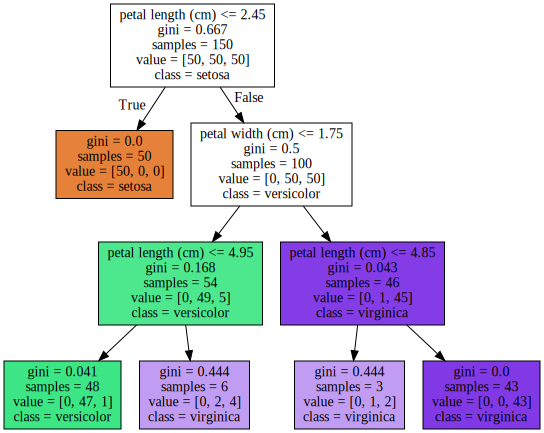

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                out_file='./iris_tree.dot',
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                filled=True)

Source.from_file('./iris_tree.dot')

In [ ]:
tree_clf=DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
len(X)

150

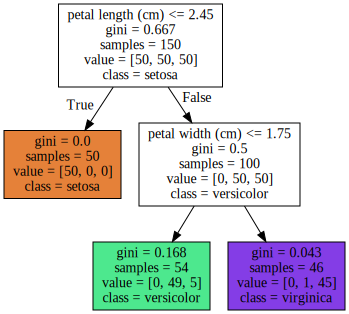

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                out_file='./iris_tree.dot',
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                filled=True)

Source.from_file('./iris_tree.dot')

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

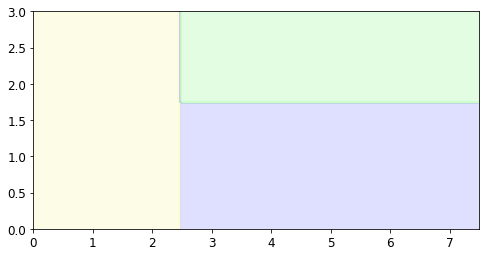

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf,X,y,axes=[0,7.5,0,3],iris=True,
                           legend=False,plot_training=True):
  
  x1s=np.linspace(axes[0],axes[1],100)
  x2s=np.linspace(axes[2],axes[3],100)
  x1,x2=np.meshgrid(x1s,x2s)
  X_new=np.c_[x1.ravel(),x2.ravel()]
  y_pred=clf.predict(X_new).reshape(x1.shape)

  custom_cmap=ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)

  if not iris:
    custom_cmap2=ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1,x2,y_pred,cmap=custom_cmap2,alpha=0.8)

plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf,X,y)

Text(4.05, 0.5, '(Depth=2)')

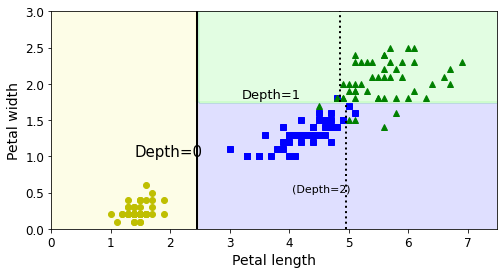

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf,X,y,axes=[0,7.5,0,3],iris=True,
                           legend=False,plot_training=True):
  
  x1s=np.linspace(axes[0],axes[1],100)
  x2s=np.linspace(axes[2],axes[3],100)
  x1,x2=np.meshgrid(x1s,x2s)
  X_new=np.c_[x1.ravel(),x2.ravel()]
  y_pred=clf.predict(X_new).reshape(x1.shape)

  custom_cmap=ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)

  if not iris:
    custom_cmap2=ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1,x2,y_pred,cmap=custom_cmap2,alpha=0.8)

  if plot_training:
    plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',label='Iris setosa')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'bs',label='Iris versicolor')
    plt.plot(X[:,0][y==2],X[:,1][y==2],'g^',label='Iris virginica')

  if iris:
    plt.xlabel('Petal length',fontsize=14)
    plt.ylabel('Petal width',fontsize=14)
  else:
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)      

  if legend:
    plt.legend(loc='lower right',fontsize=14)            

plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf,X,y)

#For decision boundaries(black lines)
plt.plot([2.45,2.45],[0,3],'k-',linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)

plt.text(1.40,1.0,"Depth=0",fontsize=15)
plt.text(3.2,1.80,"Depth=1",fontsize=13)
plt.text(4.05,0.5,"(Depth=2)",fontsize=11)

In [ ]:
X[:,0][y==0]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [ ]:
a=np.c_[np.array([1,2,3]),np.array([4,5,6])]
a

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
a.ravel()

array([1, 4, 2, 5, 3, 6])

In [ ]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict_proba([[6,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5,1.5]])

array([1])

Sensitivity to training set details

In [ ]:
iris.feature_names[2:]

['petal length (cm)', 'petal width (cm)']

In [ ]:
# widest iris versicolor
X[(X[:,1]==(X[:,1][y==1].max())) & (y==1)]

array([[4.8, 1.8]])

In [ ]:
not_widest_versicolor=(X[:,1]!=1.8) | (y==2)
print(len(not_widest_versicolor))
print(not_widest_versicolor)

150
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [ ]:
X_tweaked=X[not_widest_versicolor]
y_tweaked=y[not_widest_versicolor]

tree_clf_tweaked=DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf_tweaked.fit(X_tweaked,y_tweaked)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

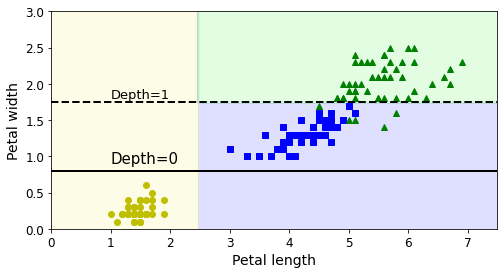

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

In [ ]:
a=np.array([(1,2),(3,2),(3,4),(5,6)])
b=np.array([1,2,1,4])
a[(a[:,1]==2) | (b==1)]

array([[1, 2],
       [3, 2],
       [3, 4]])

In [ ]:
from sklearn.datasets import make_moons

Xm,ym=make_moons(n_samples=100,noise=0.25,random_state=53)

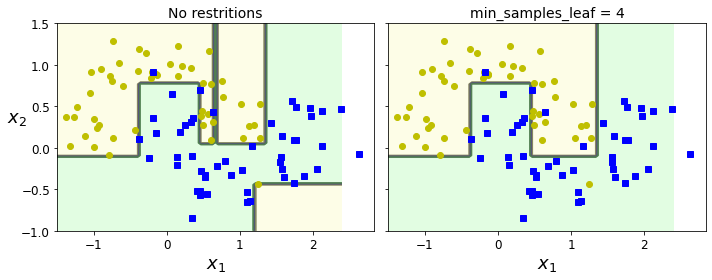

In [ ]:
deep_tree_clf1=DecisionTreeClassifier(random_state=42)
deep_tree_clf2=DecisionTreeClassifier(min_samples_leaf=4,random_state=42)

deep_tree_clf1.fit(Xm,ym)
deep_tree_clf2.fit(Xm,ym)

fig,axes=plt.subplots(ncols=2,figsize=(10,4),sharey=True)

plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1,Xm,ym,axes=[-1.5,2.4,-1,1.5], iris=False)
plt.title('No restritions',fontsize=14)

plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2,Xm,ym,axes=[-1.5,2.4,-1,1.5],iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel('')

plt.tight_layout()

plt.show()

In [ ]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf91bebe80>,
      dtype=object)

In [ ]:
angle=(np.pi/180)*20
rotation_matrix=np.array([[np.cos(angle),-np.sin(angle)],
                          [np.sin(angle),np.cos(angle)]])
print(rotation_matrix)

[[ 0.93969262 -0.34202014]
 [ 0.34202014  0.93969262]]


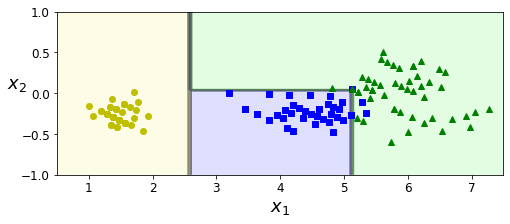

In [ ]:
Xr=X.dot(rotation_matrix)

tree_clf_r=DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr,y)

plt.figure(figsize=(8,3))
plot_decision_boundary(tree_clf_r,Xr,y,axes=[0.5,7.5,-1,1],iris=False)

plt.show()

In [ ]:
np.random.seed(6)
Xs=np.random.rand(100,2)-0.5
ys=(Xs[:,0]>0).astype(np.float32)*2. #0,2

In [ ]:
len(Xs[(Xs[:,1]>0.1) & (ys==2)])

18

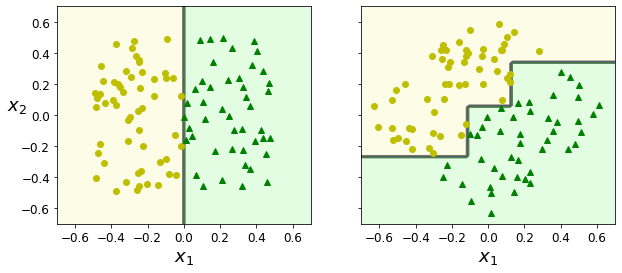

In [ ]:
angle=np.pi/4
rotation_matrix=np.array([[np.cos(angle),-np.sin(angle)],
                          [np.sin(angle), np.cos(angle)]])
Xsr=Xs.dot(rotation_matrix)

tree_clf_s=DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs,ys)
tree_clf_sr=DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr,ys)

fig,axes=plt.subplots(ncols=2,figsize=(10,4),sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s,Xs,ys,axes=[-0.7,0.7,-0.7,0.7],iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.show()

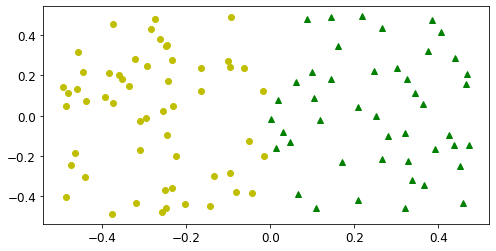

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(Xs[:,0][ys==0],Xs[:,1][ys==0],'yo')
plt.plot(Xs[:,0][ys==2],Xs[:,1][ys==2],'g^')

Regression trees

In [ ]:
#Quadratic training set+noise
np.random.seed(42)
m=200
X=np.random.rand(m,1)
y=4*(X-0.5)**2
y=y+np.random.randn(m,1)/10

In [ ]:
np.random.randint(1,100,size=(10,1))

array([[67],
       [45],
       [13],
       [92],
       [58],
       [20],
       [92],
       [72],
       [61],
       [39]])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(max_depth=2,random_state=4)
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=4, splitter='best')

In [ ]:
tree_reg1=DecisionTreeRegressor(random_state=42,max_depth=2)
tree_reg2=DecisionTreeRegressor(random_state=42,max_depth=3)
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

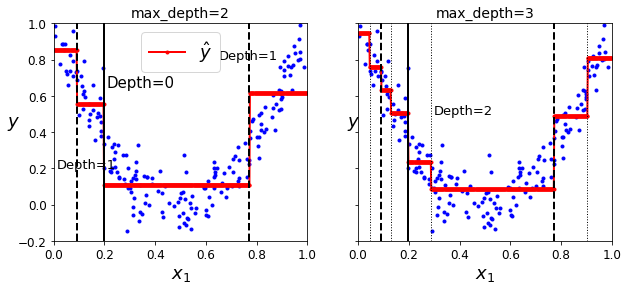

In [ ]:
def plot_regression_predictions(tree_reg,X,y,axes=[0,1,-0.2,1],y_label='$y$'):
  x1=np.linspace(axes[0],axes[1],500).reshape(-1,1)
  y_pred=tree_reg.predict(x1)
  plt.axis(axes)
  plt.xlabel('$x_1$',fontsize=18)
  if y_label:
    plt.ylabel(y_label,fontsize=18,rotation=0)
    plt.plot(X,y,'b.')
    plt.plot(x1,y_pred,'r.-',linewidth=2,label=r'$\hat{y}$')

fig,axes=plt.subplots(ncols=2,figsize=(10,4),sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1,X,y)
for split,style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
  plt.plot([split,split],[-0.2,1],style,linewidth=2)

plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2,X,y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split,split],[-0.2, 1],style,linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split],[-0.2, 1],"k:",linewidth=1)

plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

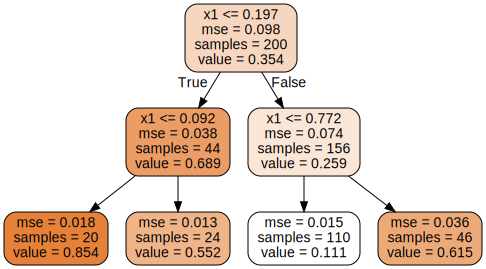

In [ ]:
export_graphviz(tree_reg1,
       out_file='./regression_tree.dot',
       feature_names=['x1'],
       rounded=True,
       filled=True)

Source.from_file('./regression_tree.dot')

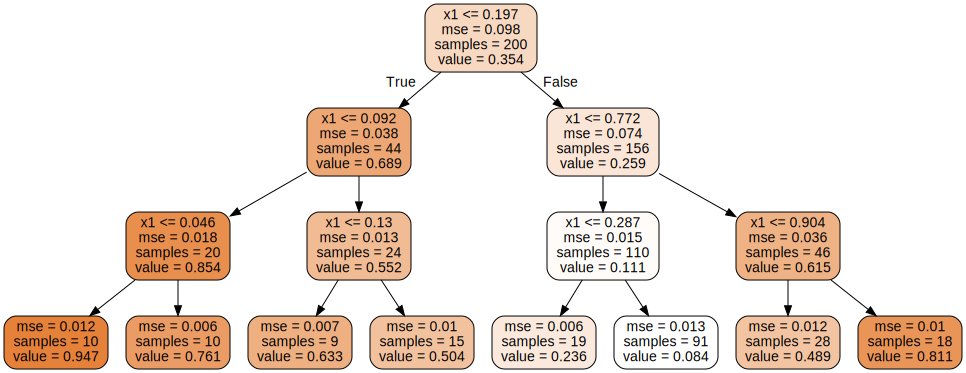

In [ ]:
export_graphviz(tree_reg2,
       out_file='./regression_tree.dot',
       feature_names=['x1'],
       rounded=True,
       filled=True)

Source.from_file('./regression_tree.dot')

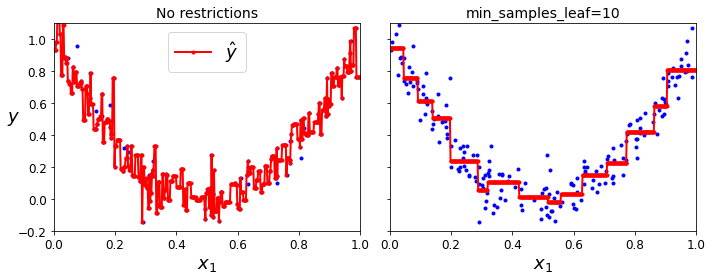

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)    #max_depth and min_samples_leaf not given
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.tight_layout()

plt.show()
